In [156]:
import pandas as pd
import numpy as np
import os 
#import libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
#Setting working directory
os.chdir("E:\data science_edwisor\Project 2 Employee Absenteesim")
#Reading dataset
data = pd.read_excel("Absenteeism_at_work_Project.xls")
data.head()

<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<ipython-input-157-7a03e1c3ec91>:2: DeprecationWarning: invalid escape sequence \d
  os.chdir("E:\data science_edwisor\Project 2 Employee Absenteesim")


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


# Exploratory Data Analysis

In [158]:
data.shape

(740, 21)

In [159]:
data.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [160]:
data.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [161]:
# From the EDA and problem statement file categorising the variables in two category " Continuos" and "Categorical"

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

In [162]:
# Trnasforming data type
data['ID']= data['ID'].astype('category')
data['Reason for absence']= data['Reason for absence'].astype('category')
data['Month of absence']= data['Month of absence'].astype('category')
data['Day of the week']= data['Day of the week'].astype('category')
data['Seasons']= data['Seasons'].astype('category')
data['Disciplinary failure']= data['Disciplinary failure'].astype('category')
data['Education']= data['Education'].astype('category')
data['Social drinker']= data['Social drinker'].astype('category')
data['Social smoker']= data['Social smoker'].astype('category')
data['Pet']= data['Pet'].astype('category')
data['Son']= data['Son'].astype('category')

In [163]:
data.isnull().sum()


ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64

# Missing value analysis

In [164]:
Miss_data = pd.DataFrame(data.isnull().sum())
Miss_data = Miss_data.rename(columns={0:"Miss_sum"})
Miss_data["Miss_percent"] = (Miss_data["Miss_sum"]/len(data))*100
Miss_data

,Miss_sum,Miss_percent
ID,0,0.000000
Reason for absence,3,0.405405
Month of absence,1,0.135135
Day of the week,0,0.000000
Seasons,0,0.000000
Transportation expense,7,0.945946
Distance from Residence to Work,3,0.405405
Service time,3,0.405405
Age,3,0.405405
Work load Average/day,10,1.351351


# Missing value imputation

In [51]:
#Actual value = 31
#Mean = 26.67
#Median = 25
#KNN = 30.80
data['Body mass index'].iloc[1]

#Set the value of first row in Body mass index as NAN
#create missing value
data['Body mass index'].iloc[1] = np.nan

C:\Users\abhir\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
#Impute with mean
#data['Body mass index'] = data['Body mass index'].fillna(data['Body mass index'].mean())

In [53]:
data['Body mass index'].iloc[1]

nan

In [54]:
#Impute with median
#data['Body mass index'] = data['Body mass index'].fillna(data['Body mass index'].median())

In [55]:
data['Body mass index'].iloc[1]

nan

In [165]:
from fancyimpute import KNN

In [166]:
#Apply KNN imputation algorithm
data = pd.DataFrame(KNN(k = 3).fit_transform(data), columns = data.columns)
data['Body mass index'].iloc[1]

Imputing row 1/740 with 0 missing, elapsed time: 0.221
Imputing row 101/740 with 1 missing, elapsed time: 0.225
Imputing row 201/740 with 0 missing, elapsed time: 0.225
Imputing row 301/740 with 0 missing, elapsed time: 0.229
Imputing row 401/740 with 0 missing, elapsed time: 0.229
Imputing row 501/740 with 0 missing, elapsed time: 0.233
Imputing row 601/740 with 0 missing, elapsed time: 0.233
Imputing row 701/740 with 0 missing, elapsed time: 0.237


31.0

In [167]:
#Round the values of categorical values
for i in categorical_vars:
    data.loc[:,i] = data.loc[:,i].round()    
    data.loc[:,i] = data.loc[:,i].astype('category')

In [168]:

#Check if any missing values
data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# Distribution of data using graphs

C:\Users\abhir\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\abhir\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\abhir\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\abhir\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height

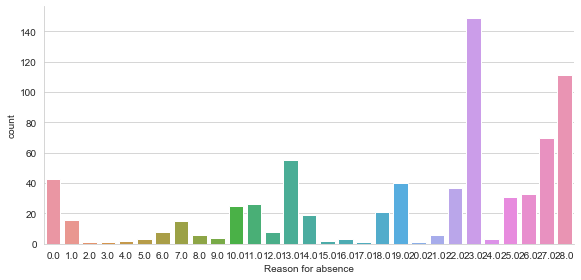

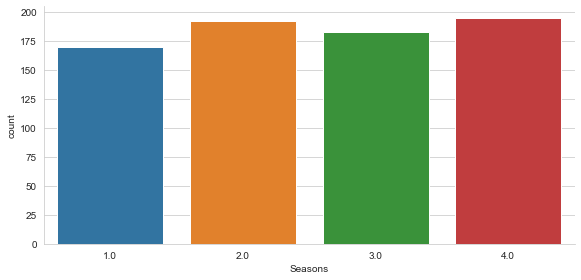

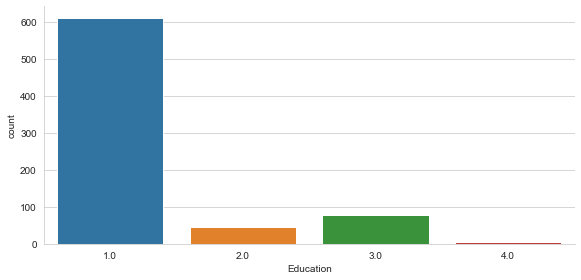

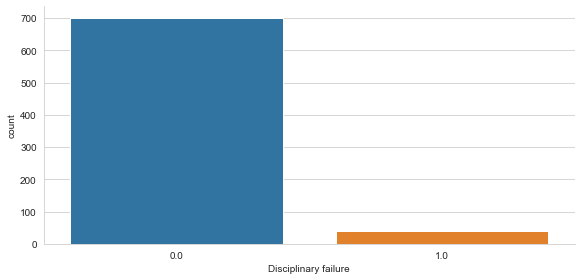

In [169]:
#Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=data, x='Reason for absence', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='Seasons', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='Education', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='Disciplinary failure', kind= 'count',size=4,aspect=2)

C:\Users\abhir\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\abhir\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\abhir\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\abhir\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height

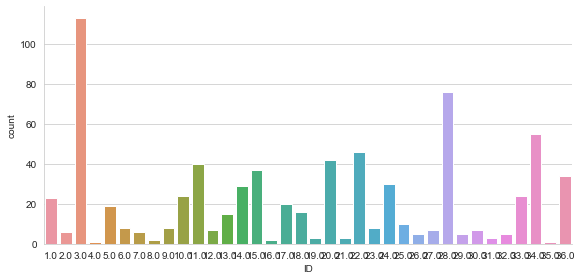

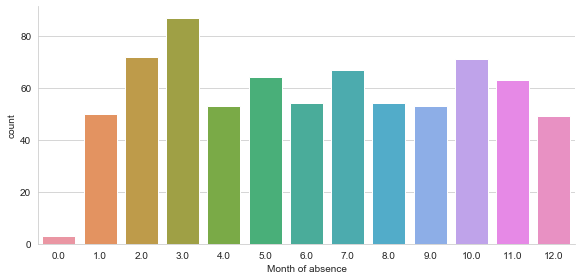

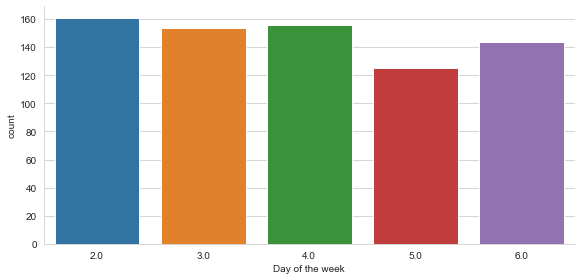

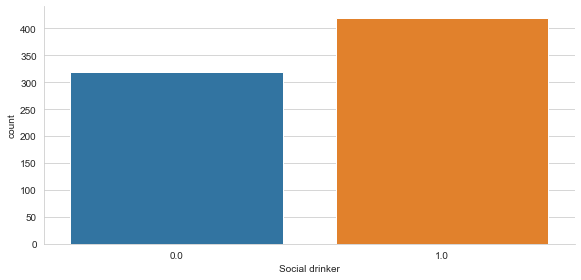

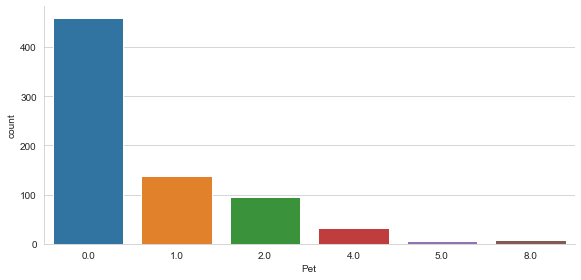

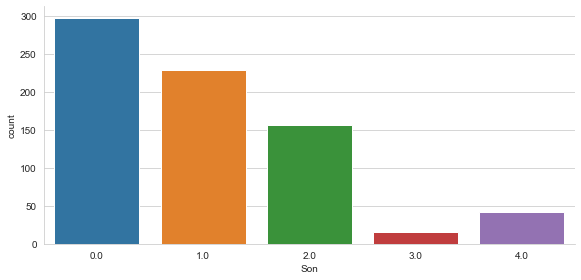

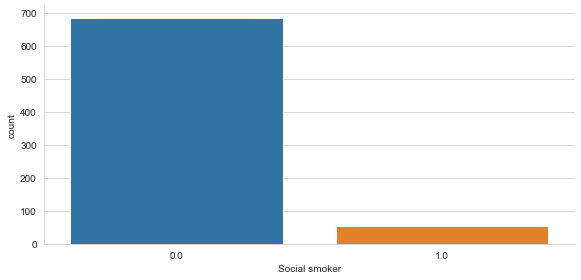

In [170]:
sns.factorplot(data=data, x='ID', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='Month of absence', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='Day of the week', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='Social drinker', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='Pet', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='Son', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='Social smoker', kind= 'count',size=4,aspect=2)

Text(0.5, 1.0, 'Distance from Residence to Work')

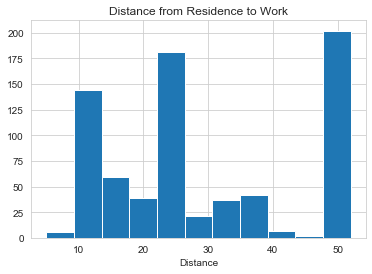

In [171]:
#Check the distribution of numerical data using histogram
plt.hist(data=data, x='Distance from Residence to Work', bins='auto', label='Distance from Residence to Work')
plt.xlabel('Distance')
plt.title("Distance from Residence to Work")

Text(0.5, 1.0, 'Service time Distribution')

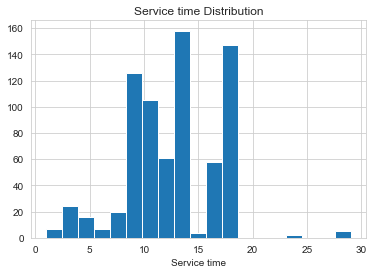

In [172]:
plt.hist(data=data, x='Service time', bins='auto', label='Service time')
plt.xlabel('Service time')
plt.title("Service time Distribution")

Text(0.5, 1.0, 'Age Distribution')

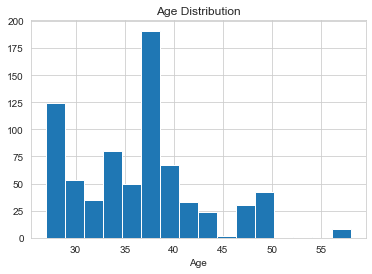

In [173]:
plt.hist(data=data, x='Age', bins='auto')
plt.xlabel('Age')
plt.title("Age Distribution")

Text(0.5, 1.0, 'Histogram of Work load Average/day')

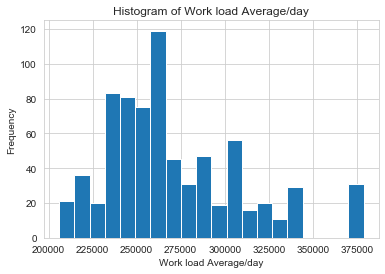

In [174]:
plt.hist(data['Work load Average/day '],bins = 'auto')
plt.xlabel("Work load Average/day")
plt.ylabel("Frequency")
plt.title("Histogram of Work load Average/day")

Text(0.5, 1.0, 'Transportation expense Distribution')

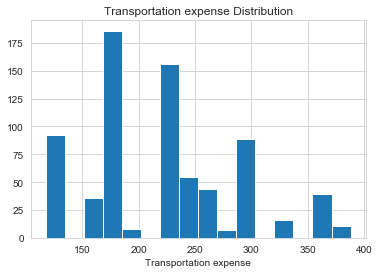

In [175]:
plt.hist(data=data, x='Transportation expense', bins='auto')
plt.xlabel('Transportation expense')
plt.title("Transportation expense Distribution")

Text(0.5, 1.0, 'Histogram of Hit target')

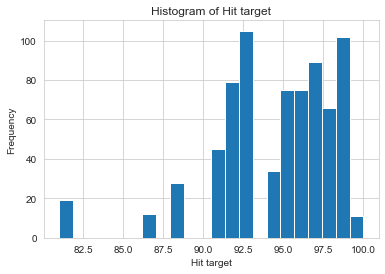

In [176]:
plt.hist(data['Hit target'],bins = 'auto')
plt.xlabel("Hit target")
plt.ylabel("Frequency")
plt.title("Histogram of Hit target")

Text(0.5, 1.0, 'Histogram of Weight')

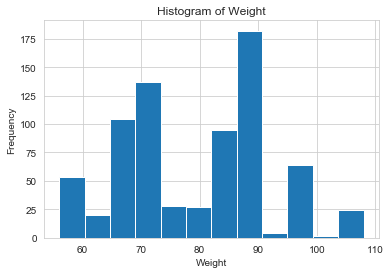

In [177]:
plt.hist(data['Weight'],bins = 'auto')
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Histogram of Weight")

Text(0.5, 1.0, 'Histogram of Height')

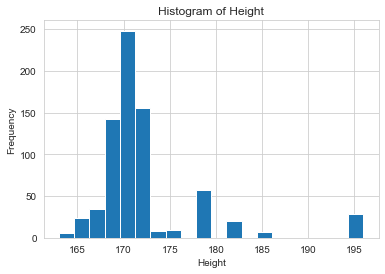

In [178]:
plt.hist(data['Height'], bins=20)
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.title("Histogram of Height")

Text(0.5, 1.0, 'Histogram of Body mass index')

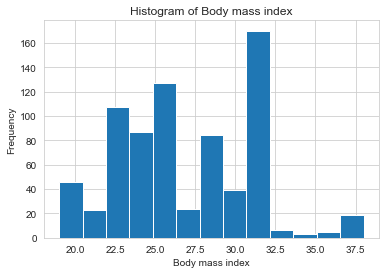

In [179]:
plt.hist(data['Body mass index'], bins='auto')
plt.xlabel("Body mass index")
plt.ylabel("Frequency")
plt.title("Histogram of Body mass index")

Text(0.5, 1.0, 'Histogram of Absenteeism time in hours')

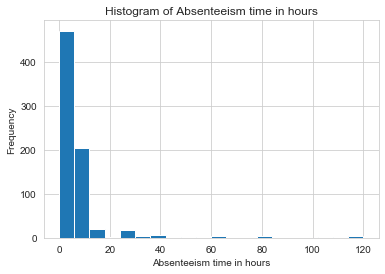

In [182]:
plt.hist(data['Absenteeism time in hours'],bins=20)
plt.xlabel("Absenteeism time in hours")
plt.ylabel("Frequency")
plt.title("Histogram of Absenteeism time in hours")

# Outlier Analysis

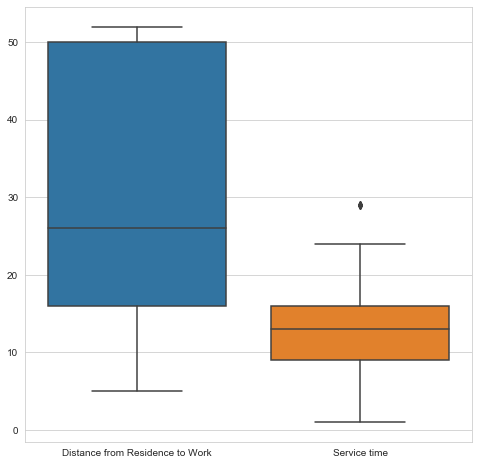

In [183]:
#Check for outliers in data using boxplot
sns.boxplot(data=data[['Distance from Residence to Work', 'Service time']])
fig=plt.gcf()
fig.set_size_inches(8,8)

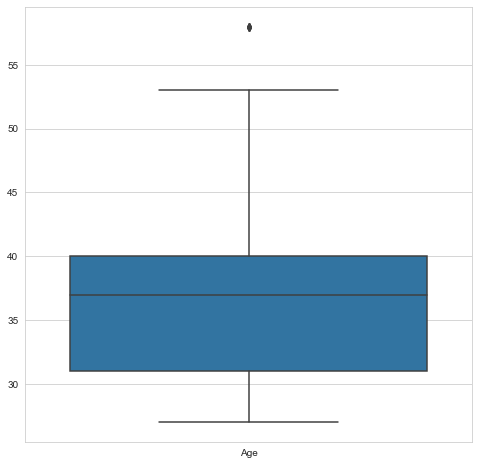

In [184]:
#Check for outliers in data using boxplot
sns.boxplot(data=data[['Age']])
fig=plt.gcf()
fig.set_size_inches(8,8)

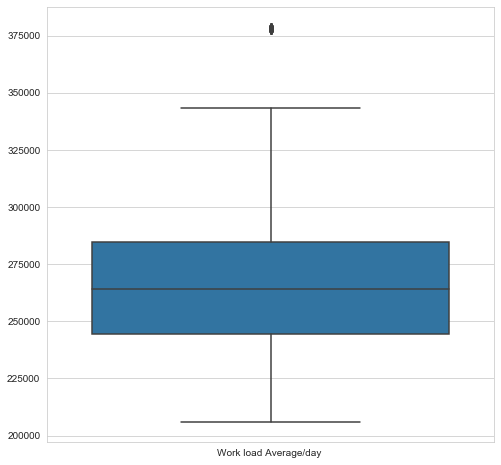

In [185]:
#Check for outliers in data using boxplot
sns.boxplot(data=data[['Work load Average/day ']])
fig=plt.gcf()
fig.set_size_inches(8,8)

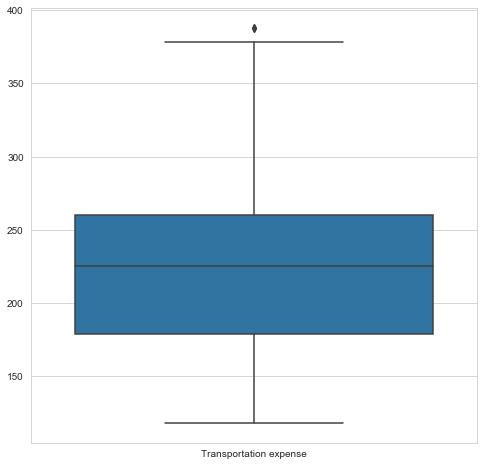

In [186]:
sns.boxplot(data=data[['Transportation expense']])
fig=plt.gcf()
fig.set_size_inches(8,8)

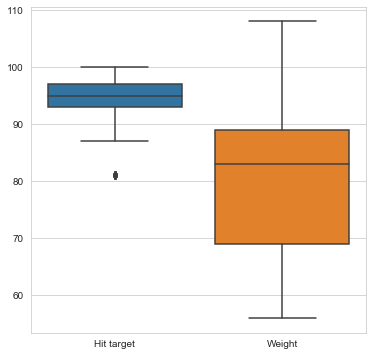

In [187]:
sns.boxplot(data=data[['Hit target', 'Weight']])
fig=plt.gcf()
fig.set_size_inches(6,6)

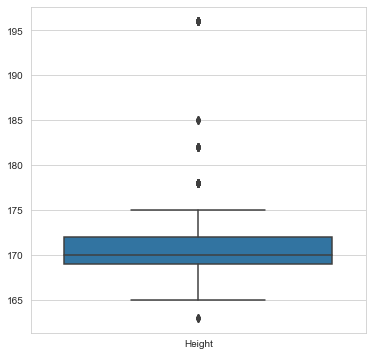

In [188]:
sns.boxplot(data=data[['Height']])
fig=plt.gcf()
fig.set_size_inches(6,6)

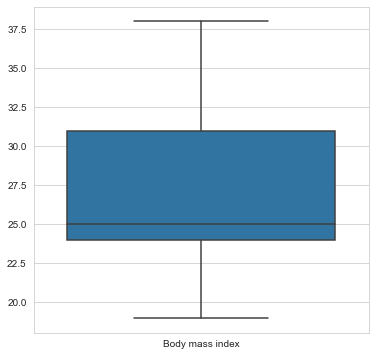

In [189]:
sns.boxplot(data=data[['Body mass index']])
fig=plt.gcf()
fig.set_size_inches(6,6)

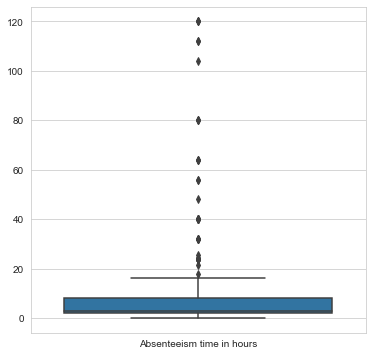

In [190]:
sns.boxplot(data=data[['Absenteeism time in hours']])
fig=plt.gcf()
fig.set_size_inches(6,6)

In [191]:
# list of variables which doesn't have outlier
neglect = ['Distance from Residence to Work', 'Weight', 'Body mass index']

In [192]:
# Looping over all continuou variables to detect and remove Outliers
for i in continuous_vars:
    # Avoiding the variables which doesn't have outlier
    if i in neglect:
        continue
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(data[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25

In [193]:
# Calculating upper extream and lower extream
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

In [194]:
# Replacing all the outliers value to NA
data.loc[data[i]< minimum,i] = np.nan
data.loc[data[i]> maximum,i] = np.nan

In [195]:
# Impute missing values with KNN
data = pd.DataFrame(KNN(k = 3).fit_transform(data), columns = data.columns)
# Checking if there is any missing value
data.isnull().sum()

Imputing row 1/740 with 0 missing, elapsed time: 0.222
Imputing row 101/740 with 0 missing, elapsed time: 0.227
Imputing row 201/740 with 0 missing, elapsed time: 0.230
Imputing row 301/740 with 0 missing, elapsed time: 0.231
Imputing row 401/740 with 0 missing, elapsed time: 0.231
Imputing row 501/740 with 0 missing, elapsed time: 0.231
Imputing row 601/740 with 0 missing, elapsed time: 0.231
Imputing row 701/740 with 0 missing, elapsed time: 0.231


ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

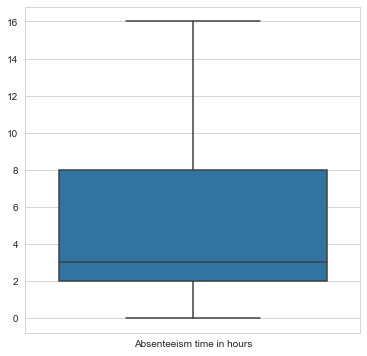

In [196]:
sns.boxplot(data=data[['Absenteeism time in hours']])
fig=plt.gcf()
fig.set_size_inches(6,6)

# Feature selection

In [197]:
#Get dataframe with all continuous variables
data_corr = data.loc[:,continuous_vars]

[]

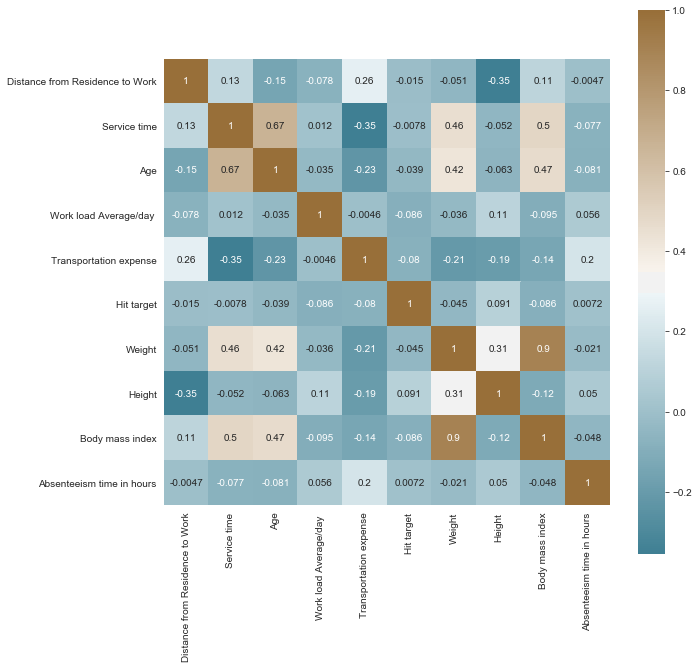

In [148]:
#Check for multicollinearity using corelation graph
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = data_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [199]:
#Variable Reduction
to_drop = ['Weight']
data = data.drop(to_drop, axis = 1)

In [200]:
# Updating the Continuous and Categorical Variables
continuous_vars.remove('Weight')

In [201]:
continuous_vars

['Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Transportation expense',
 'Hit target',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

# Feature Scaling

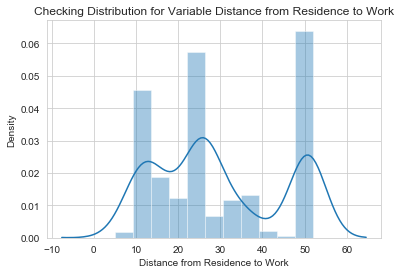

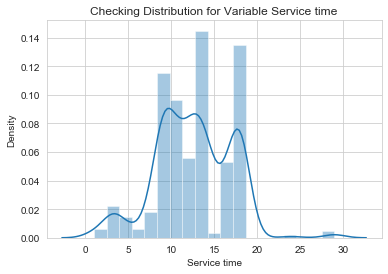

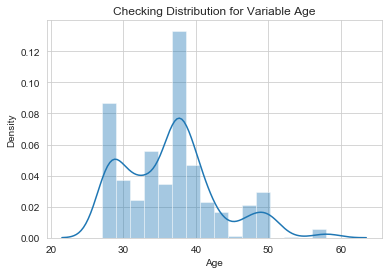

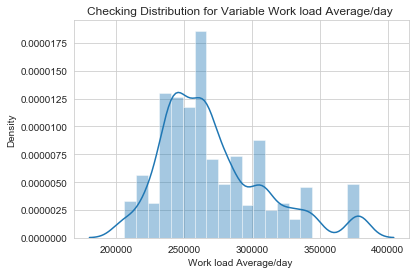

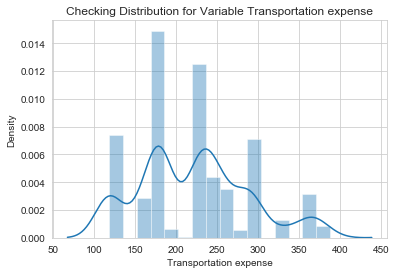

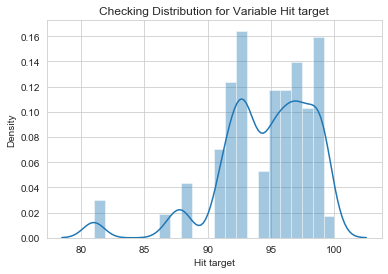

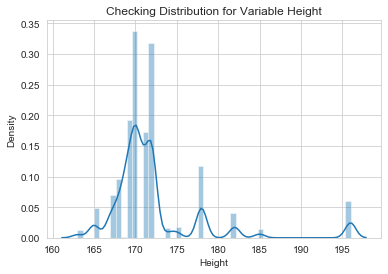

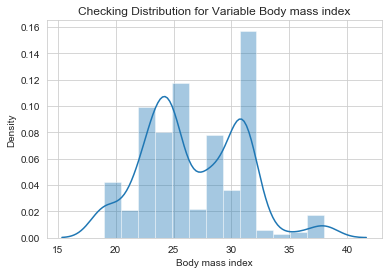

In [203]:
#Normality check
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(data[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [204]:
#Normalization of continuous variables
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    data[i] = (data[i] - data[i].min())/(data[i].max()-data[i].min())

# Machine Learning Models

In [206]:
#Splitting data into train and test data
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2,random_state=123)

# Decision Tree

In [210]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor

In [211]:
#train the model
dt_data = DecisionTreeRegressor(random_state=123).fit(train.iloc[:,0:19],train.iloc[:,19])

In [212]:
#Prediction of the hr
dt_data_pred = dt_data.predict(test.iloc[:,0:19])

In [213]:
#Creating dataframe for actual and predicted value
dtpred_data = pd.DataFrame({'actual': test.iloc[:,19], 'pred': dt_data_pred})

In [214]:
dtpred_data.head()

,actual,pred
249,7.972083,8.0
735,8.000000,8.0
171,1.000000,2.0
675,3.000000,8.0
209,4.000000,1.0


In [233]:
# Function for Mean Absolute Percentage Error
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual - y_pred)/y_actual))
    return mape

In [227]:
from sklearn.metrics import mean_squared_error
import math

In [230]:
#RMSE
math.sqrt(mean_squared_error(test.iloc[:,19],dt_data_pred))

3.6485449097832294

# Random Forest

In [237]:
#Import library for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [238]:
#Train the model
rf_data = RandomForestRegressor(n_estimators=200,random_state=123).fit(train.iloc[:,0:19], train.iloc[:,19])

In [239]:
#Prediction on hr
rf_data_prd = rf_data.predict(test.iloc[:,0:19])

In [240]:
#Creating dataframe for actual and predicted value
rfpred_data = pd.DataFrame({'actual': test.iloc[:,19], 'pred': rf_data_prd})
rfpred_data.head()

,actual,pred
249,7.972083,8.400630
735,8.000000,7.689293
171,1.000000,2.195000
675,3.000000,6.924257
209,4.000000,4.858126


In [241]:
#RMSE
math.sqrt(mean_squared_error(test.iloc[:,19],rf_data_prd))

3.0538491314638665

# Linear Regression

In [243]:
#import libraries for Linear regression
import statsmodels.api as sm

In [244]:
#Train the model
lr_data = sm.OLS(train.iloc[:,19].astype(float), train.iloc[:,0:19].astype(float)).fit()

In [245]:
#Check the summary of model
lr_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared (uncentered):                   0.709
Model:                                   OLS   Adj. R-squared (uncentered):              0.700
Method:                        Least Squares   F-statistic:                              73.64
Date:                       Fri, 06 Mar 2020   Prob (F-statistic):                   6.51e-140
Time:                               16:06:01   Log-Likelihood:                         -1486.4
No. Observations:                        592   AIC:                                      3011.
Df Residuals:                            573   BIC:                                      3094.
Df Model:                                 19                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
ID                                  0.0103      0.014      0.716      0.474      -0.018       0.038
Reason for absence                 -0.1101      0.018     -6.246      0.000      -0.145      -0.076
Month of absence                    0.1191      0.044      2.694      0.007       0.032       0.206
Day of the week                    -0.0238      0.091     -0.260      0.795      -0.203       0.156
Seasons                            -0.1502      0.131     -1.145      0.253      -0.408       0.108
Transportation expense              3.2445      0.646      5.025      0.000       1.976       4.513
Distance from Residence to Work    -0.2368      0.615     -0.385      0.700      -1.444       0.970
Service time                       -0.6672      1.404     -0.475      0.635      -3.425       2.090
Age                                -0.8857      0.976     -0.907      0.365      -2.803       1.032
Work load Average/day               1.4798      0.609      2.432      0.015       0.285       2.675
Hit target                          2.3414      0.663      3.530      0.000       1.039       3.644
Disciplinary failure               -6.8204      0.706     -9.666      0.000      -8.206      -5.434
Education                           0.7631      0.224      3.403      0.001       0.323       1.204
Son                                 0.3682      0.137      2.691      0.007       0.099       0.637
Social drinker                      0.9283      0.422      2.198      0.028       0.099       1.758
Social smoker                       1.3549      0.538      2.519      0.012       0.298       2.411
Pet                                -0.1265      0.118     -1.075      0.283      -0.357       0.105
Height                              1.2189      0.868      1.405      0.161      -0.486       2.923
Body mass index                     3.2371      0.774      4.183      0.000       1.717       4.757
==============================================================================
Omnibus:                      138.008   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.775
Skew:                           1.178   Prob(JB):                     1.11e-76
Kurtosis:                       5.938   Cond. No.                         379.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
#Prediction of hr
lr_data_prd = lr_data.predict(test.iloc[:,0:19])

In [247]:
#Creating dataframe for actual and predicted value
rlpred_data = pd.DataFrame({'actual': test.iloc[:,19], 'pred': lr_data_prd})
rlpred_data.head()

,actual,pred
249,7.972083,7.293803
735,8.000000,7.112948
171,1.000000,3.481059
675,3.000000,7.945430
209,4.000000,4.106283


In [248]:
#RMSE
math.sqrt(mean_squared_error(test.iloc[:,19],lr_data_prd))

3.099668935491577

In [250]:
# saving the best model(Random Forest) output data
result=pd.DataFrame(test.iloc[:,0:19])
result['pred_cnt'] = (rf_data_prd)
result.to_csv("Random forest output python.csv",index=False)

# Model inference

In [251]:
reason_summary = data.loc[:,("Reason for absence","Absenteeism time in hours")]

In [252]:
reason_sum_hours = reason_summary.groupby("Reason for absence").sum()
reason_sum_hours

,Absenteeism time in hours
Reason for absence,
0.0,42.424928
1.0,123.000015
2.0,1.842860
3.0,8.000000
4.0,9.000000
5.0,19.000000
6.0,52.787174
7.0,73.245733
8.0,32.000000


In [253]:
reason_mean_hours =  reason_summary.groupby("Reason for absence").mean()
reason_mean_hours

,Absenteeism time in hours
Reason for absence,
0.0,0.986626
1.0,7.687501
2.0,1.842860
3.0,8.000000
4.0,4.500000
5.0,6.333333
6.0,6.598397
7.0,4.883049
8.0,5.333333


In [254]:
reason_count_hours = reason_summary.groupby("Reason for absence").count()
reason_count_hours

,Absenteeism time in hours
Reason for absence,
0.0,43
1.0,16
2.0,1
3.0,1
4.0,2
5.0,3
6.0,8
7.0,15
8.0,6


# Monthly loss for the Company

In [255]:
#absenteeism_data.columns.values
loss_data = data[["Month of absence","Work load Average/day ","Service time","Absenteeism time in hours"]]

#We define work loss = (Work load Average/day/Service time)*Absenteeism time in hours

In [265]:
loss_data["Work Loss"]=(data["Work load Average/day "]/data["Service time"])*data["Absenteeism time in hours"]
loss_data

C:\Users\abhir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Month of absence,Work load Average/day,Service time,Absenteeism time in hours,Work Loss
0,7.0,0.194471,0.428571,4.0,1.815059
1,7.0,0.194471,0.607143,0.0,0.000000
2,7.0,0.194471,0.607143,2.0,0.640609
3,7.0,0.194471,0.464286,4.0,1.675439
4,7.0,0.194471,0.428571,2.0,0.907530
...,...,...,...,...,...
735,7.0,0.339296,0.428571,8.0,6.333524
736,7.0,0.339296,0.464286,4.0,2.923165
737,0.0,0.377540,0.428571,0.0,0.000000
738,0.0,0.377540,0.464286,0.0,0.000000


In [260]:
monthly_loss = loss_data[["Month of absence","Work Loss"]]

In [261]:
monthly_loss = monthly_loss.groupby("Month of absence").sum()
monthly_loss

,Work Loss
Month of absence,
0.0,0.000000
1.0,292.865241
2.0,inf
3.0,527.905807
4.0,259.577555
5.0,288.169558
6.0,inf
7.0,inf
8.0,165.046138


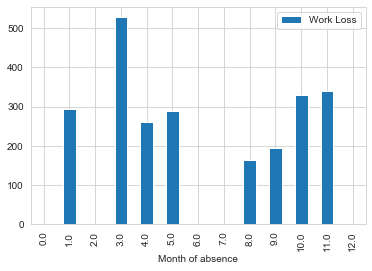

In [264]:
monthly_loss.plot(kind='bar')